Disponibiliza ferramentas de análise visual e diagnóstico

In [289]:
!pip -q install yellowbrick

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [291]:
import pickle
with open('../sample_data/labor.pkl','rb') as f:
  X_train, X_test, y_train, y_test = pickle.load(f)

Entropia mede o nível de aleatoriedade dos ramos

In [292]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(max_features = 2, criterion="entropy")
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features=2)

Teste do modelo

In [293]:
previsoes = modelo.predict(X_test)
previsoes

array(['negative', 'negative', 'negative', 'compensated_hypothyroid',
       'negative', 'negative', 'compensated_hypothyroid', 'negative',
       'negative', 'negative', 'primary_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'compensated_hypothyroid', 'negative', 'negative', 'negative',
       'negative', 'negative', 'compensated_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'compensated_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'primary_hypothyroid', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negat

O modelo acertou?

In [294]:
y_test

array(['negative', 'negative', 'negative', 'compensated_hypothyroid',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'primary_hypothyroid', 'primary_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'compensated_hypothyroid', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'compensated_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'compensated_hypothyroid', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative', 'negative',
       'negative', 'negative', 'negative', 'negative

0.9549668874172186

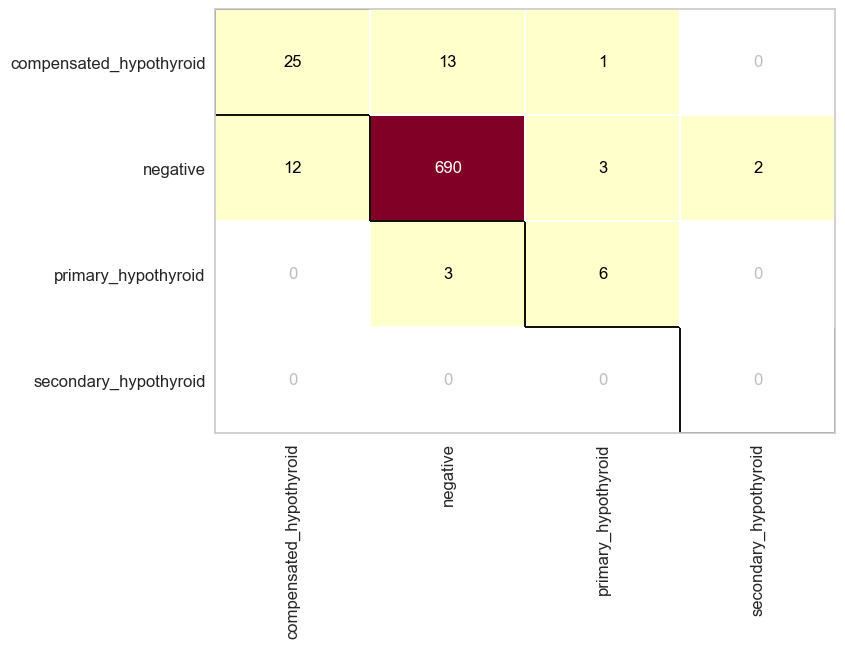

In [295]:
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)
cm = ConfusionMatrix(modelo)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Métricas do modelo

In [296]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))

                         precision    recall  f1-score   support

compensated_hypothyroid       0.68      0.64      0.66        39
               negative       0.98      0.98      0.98       707
    primary_hypothyroid       0.60      0.67      0.63         9
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.95       755
              macro avg       0.56      0.57      0.57       755
           weighted avg       0.96      0.95      0.96       755



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

**Vamos balancear usando o metodo oversampling**

In [297]:
!pip install imbalanced-learn

In [298]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Random Oversampler
ros = RandomOverSampler(random_state = 32)
#balanceamento_over = SMOTE(sampling_strategy = 'minority')
X_over, y_over = ros.fit_resample(X_train, y_train)

In [299]:
X_over.shape, y_over.shape

((11096, 1099), (11096,))

**Quantas instâncias tinha em cada classe originalmente?**

In [300]:
import numpy as np
np.unique(y_train, return_counts = True)

(array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
        'secondary_hypothyroid'], dtype=object),
 array([ 155, 2774,   86,    2], dtype=int64))

**Quantas instâncias tem agora após o balanceamento?**

In [301]:
np.unique(y_over, return_counts=True) # reduziu algumas instâncias na classe majoritária

(array(['compensated_hypothyroid', 'negative', 'primary_hypothyroid',
        'secondary_hypothyroid'], dtype=object),
 array([2774, 2774, 2774, 2774], dtype=int64))

**Vamos ver se o balanceamento melhorou a qualidade do modelo?**

In [302]:
modelo = DecisionTreeClassifier(criterion="entropy")
modelo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Teste do modelo

In [303]:
previsoes = modelo.predict(X_test)

Matrix de Confusão e acurácia

1.0

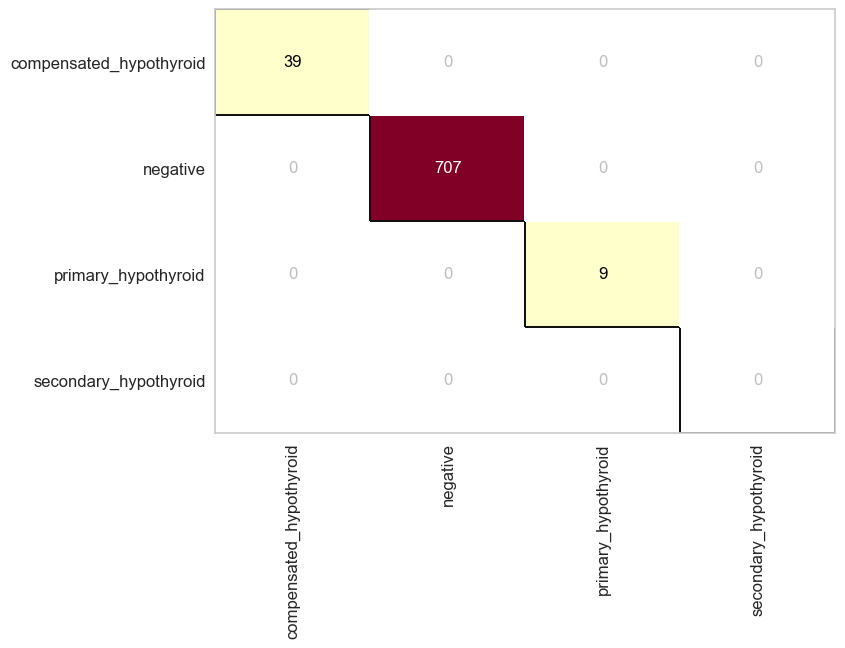

In [304]:
cm = ConfusionMatrix(modelo)
cm.fit(X_over, y_over)
cm.score(X_test, y_test)

In [305]:
print(classification_report(y_test, previsoes))

                         precision    recall  f1-score   support

compensated_hypothyroid       1.00      1.00      1.00        39
               negative       1.00      1.00      1.00       707
    primary_hypothyroid       1.00      1.00      1.00         9

               accuracy                           1.00       755
              macro avg       1.00      1.00      1.00       755
           weighted avg       1.00      1.00      1.00       755



In [306]:
import pickle
with open('../sample_data/balanced_labor.pkl', 'wb') as f:
    pickle.dump([X_over, X_test, y_over, y_test], f)